In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [37]:
#import state covid data from Johns Hopkins
state_cases = pd.read_csv('jhcasedata.csv')
states_only = state_cases.rename(columns={'Province_State':'state'})
states_only

,state,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-06-23 04:33:35,32.3182,-86.9023,30454,841,15974.0,13639.0,1,621.106485,349110.0,2471.0,2.761542,84000001,USA,7120.065835,8.113877
1,Alaska,US,2020-06-23 04:33:35,61.3707,-152.4044,758,12,491.0,255.0,2,103.616319,90824.0,NaN,1.583113,84000002,USA,12415.367476,NaN
2,American Samoa,US,2020-06-23 04:33:35,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,174.0,NaN,NaN,16,ASM,312.719038,NaN
3,Arizona,US,2020-06-23 04:33:35,33.7298,-111.4312,54599,1351,7581.0,45667.0,4,750.118462,429790.0,4185.0,2.474404,84000004,USA,5904.749422,7.664976
4,Arkansas,US,2020-06-23 04:33:35,34.9697,-92.3731,16083,227,10793.0,5063.0,5,532.937195,256339.0,1164.0,1.411428,84000005,USA,8494.222952,7.237456
5,California,US,2020-06-23 04:33:35,36.1162,-119.6816,184765,5566,NaN,179199.0,6,467.614794,3411686.0,NaN,3.012475,84000006,USA,8634.507858,NaN
6,Colorado,US,2020-06-23 04:33:35,39.0598,-105.3111,30689,1651,4328.0,24710.0,8,532.912083,282772.0,5327.0,5.379778,84000008,USA,4910.313652,17.358011
7,Connecticut,US,2020-06-23 04:33:35,41.5978,-72.7554,45782,4263,7842.0,33677.0,9,1284.104197,397552.0,10099.0,9.311520,84000009,USA,11150.631071,22.058888
8,Delaware,US,2020-06-23 04:33:35,39.3185,-75.5071,10820,435,6459.0,3926.0,10,1111.152189,96723.0,NaN,4.020333,84000010,USA,9932.899553,NaN
9,Diamond Princess,US,2020-06-23 04:33:35,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


In [38]:
#format list of provinces and cruise ship data ultimately to remove from dataframe
state_list = list(state_cases['Province_State'])
provinces = ['American Samoa','Diamond Princess','Grand Princess','Northern Mariana Islands','Puerto Rico','Virgin Islands','Guam']
states = [x for x in state_list if x not in provinces]

In [39]:
#clean up state dataframe to remove provinces/cruise ship info
states_dict = {'state':states}
states_df = pd.DataFrame(states_dict)
state_counts_df = pd.merge(states_df,states_only,on='state',how='left')
state_counts_df

,state,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-06-23 04:33:35,32.3182,-86.9023,30454,841,15974.0,13639.0,1,621.106485,349110.0,2471.0,2.761542,84000001,USA,7120.065835,8.113877
1,Alaska,US,2020-06-23 04:33:35,61.3707,-152.4044,758,12,491.0,255.0,2,103.616319,90824.0,NaN,1.583113,84000002,USA,12415.367476,NaN
2,Arizona,US,2020-06-23 04:33:35,33.7298,-111.4312,54599,1351,7581.0,45667.0,4,750.118462,429790.0,4185.0,2.474404,84000004,USA,5904.749422,7.664976
3,Arkansas,US,2020-06-23 04:33:35,34.9697,-92.3731,16083,227,10793.0,5063.0,5,532.937195,256339.0,1164.0,1.411428,84000005,USA,8494.222952,7.237456
4,California,US,2020-06-23 04:33:35,36.1162,-119.6816,184765,5566,NaN,179199.0,6,467.614794,3411686.0,NaN,3.012475,84000006,USA,8634.507858,NaN
5,Colorado,US,2020-06-23 04:33:35,39.0598,-105.3111,30689,1651,4328.0,24710.0,8,532.912083,282772.0,5327.0,5.379778,84000008,USA,4910.313652,17.358011
6,Connecticut,US,2020-06-23 04:33:35,41.5978,-72.7554,45782,4263,7842.0,33677.0,9,1284.104197,397552.0,10099.0,9.311520,84000009,USA,11150.631071,22.058888
7,Delaware,US,2020-06-23 04:33:35,39.3185,-75.5071,10820,435,6459.0,3926.0,10,1111.152189,96723.0,NaN,4.020333,84000010,USA,9932.899553,NaN
8,District of Columbia,US,2020-06-23 04:33:35,38.8974,-77.0268,10058,535,1182.0,8341.0,11,1425.152568,82004.0,NaN,5.319149,84000011,USA,11619.428437,NaN
9,Florida,US,2020-06-23 04:33:35,27.7663,-81.6868,100217,3173,NaN,97044.0,12,466.608749,1617487.0,13407.0,3.166129,84000012,USA,7530.993605,13.377970


In [40]:
#import ICU bed info
county_beds_df = pd.read_csv("County Beds.csv")
county_beds_df = county_beds_df.rename(columns={"County":"county", "State":"state"})
county_beds_df.head()

,county,state,ICU Beds,Total Population,Population Aged 60+,Percent of Population Aged 60+,Residents Aged 60+ Per Each ICU Bed
0,Autauga,Alabama,6,55036,10523,19.1,1754.0
1,Baldwin,Alabama,51,203360,53519,26.3,1049.0
2,Barbour,Alabama,5,26201,6150,23.5,1230.0
3,Bibb,Alabama,0,22580,4773,21.1,NaN
4,Blount,Alabama,6,57667,13600,23.6,2267.0


In [41]:
#format new dataframe of states and ICU beds to merge into cleaned up state dataframe
state_beds = county_beds_df.groupby('state')
bed_counts = state_beds['ICU Beds'].sum().astype(float)
bed_counts_df = pd.DataFrame(bed_counts).reset_index()
bed_counts_df.head() 

,state,ICU Beds
0,Alabama,1533.0
1,Alaska,119.0
2,Arizona,1559.0
3,Arkansas,732.0
4,California,7338.0


In [42]:
#also add population 60+ and state info to merge into state info dataframe
state_beds = county_beds_df.groupby('state')
senior_counts = state_beds['Population Aged 60+'].sum().astype(float)
senior_counts_df = pd.DataFrame(senior_counts).reset_index()
senior_counts_df.head()

,state,Population Aged 60+
0,Alabama,1065625.0
1,Alaska,117047.0
2,Arizona,1502688.0
3,Arkansas,655552.0
4,California,7292299.0


In [43]:
#trim down main dataframe columns after merging in beds and 60+ pop
state_counts_beds = pd.merge(state_counts_df,bed_counts_df,on='state',how='left')
state_counts_beds.rename(columns={'ICU Beds_y':"ICU Beds"},inplace=True)
state_counts_beds['Cases Per Bed'] = state_counts_beds['Confirmed'] / state_counts_beds['ICU Beds']
state_senior_counts_beds = pd.merge(state_counts_beds,senior_counts_df,on='state',how='left')
state_senior_counts_beds = state_senior_counts_beds[['state','Confirmed','Deaths','Recovered','Active','People_Hospitalized',\
                                                     'ICU Beds','Cases Per Bed','Population Aged 60+']]
state_senior_counts_beds.head()

,state,Confirmed,Deaths,Recovered,Active,People_Hospitalized,ICU Beds,Cases Per Bed,Population Aged 60+
0,Alabama,30454,841,15974.0,13639.0,2471.0,1533.0,19.865623,1065625.0
1,Alaska,758,12,491.0,255.0,NaN,119.0,6.369748,117047.0
2,Arizona,54599,1351,7581.0,45667.0,4185.0,1559.0,35.021809,1502688.0
3,Arkansas,16083,227,10793.0,5063.0,1164.0,732.0,21.971311,655552.0
4,California,184765,5566,NaN,179199.0,NaN,7338.0,25.179204,7292299.0


In [44]:
#sort to see top states by total confirmed cases
confirmed_cases_sorted = state_senior_counts_beds.sort_values(by='Confirmed', ascending=False)
confirmed_cases_sorted.head()

,state,Confirmed,Deaths,Recovered,Active,People_Hospitalized,ICU Beds,Cases Per Bed,Population Aged 60+
32,New York,388488,31176,69710.0,287602.0,89995.0,3952.0,98.301619,4201533.0
4,California,184765,5566,NaN,179199.0,NaN,7338.0,25.179204,7292299.0
30,New Jersey,169415,12974,29522.0,126919.0,19401.0,1822.0,92.982986,1892597.0
13,Illinois,137224,6671,NaN,130553.0,NaN,3144.0,43.646310,2614633.0
43,Texas,117790,2207,69190.0,46393.0,NaN,6199.0,19.001452,4618463.0


In [45]:
#Importing state pop density information
pop_dense_df = pd.read_csv('COVID19_popdense_beds_income.csv')
pop_dense_df.rename(columns={"State":"state"},inplace=True)
pop_dense_df = pop_dense_df.loc[:,['state','Pop Density']]
pop_dense_df.head()

,state,Pop Density
0,Alaska,1.2863
1,Alabama,96.9221
2,Arkansas,58.4030
3,Arizona,64.9550
4,California,256.3727


In [46]:
#merge state pop density information into main dataframe
senior_bed_pops = pd.merge(state_senior_counts_beds,pop_dense_df,on='state',how='left')
senior_bed_pops.head()

,state,Confirmed,Deaths,Recovered,Active,People_Hospitalized,ICU Beds,Cases Per Bed,Population Aged 60+,Pop Density
0,Alabama,30454,841,15974.0,13639.0,2471.0,1533.0,19.865623,1065625.0,96.9221
1,Alaska,758,12,491.0,255.0,NaN,119.0,6.369748,117047.0,1.2863
2,Arizona,54599,1351,7581.0,45667.0,4185.0,1559.0,35.021809,1502688.0,64.9550
3,Arkansas,16083,227,10793.0,5063.0,1164.0,732.0,21.971311,655552.0,58.4030
4,California,184765,5566,NaN,179199.0,NaN,7338.0,25.179204,7292299.0,256.3727


## Do states with fewer ICU beds have greater numbers of virus deaths?

Correlation Coeficient (r) is: 0.43
The r-squared value is: 0.19


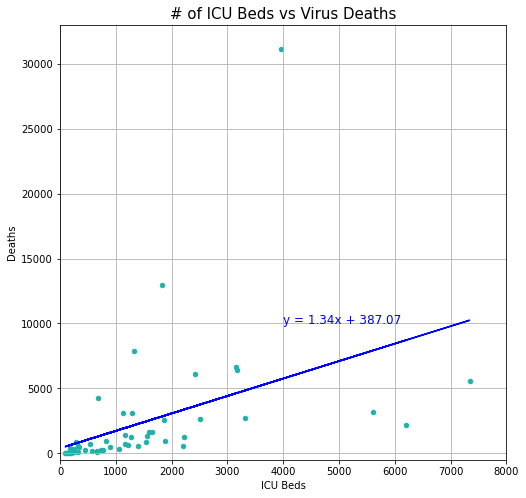

In [64]:
#Scatter plot of # of ICU Beds per Virus Deaths per State
state_deaths_beds = senior_bed_pops[['state','Deaths','ICU Beds']]
deaths_beds_stateind = state_deaths_beds.set_index('state')
x_beds = state_deaths_beds['ICU Beds']
y_deaths = state_deaths_beds['Deaths']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_beds, y_deaths)
regress_values = x_beds * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
deaths_beds_stateind.plot(kind='scatter', x='ICU Beds',y='Deaths',c='lightseagreen', xlim=(0,8000), ylim=(-500,33000), figsize=(8,8))
plt.plot(x_beds,regress_values,"b-")
plt.annotate(line_eq,(4000,10000),fontsize=12,color="blue")
plt.title('# of ICU Beds vs Virus Deaths',fontsize=15)
print(f"Correlation Coeficient (r) is: {round(rvalue,2)}")
print(f"The r-squared value is: {round(rvalue**2,2)}")

plt.grid()
plt.show()

Weak correlation between # of ICU Beds and Virus Deaths suggesting other factors involved in total # of deaths like age, preexisting health conditions/immunocompromised, etc.  Could possibly suggest hospitals aren't completely overburdened with severe cases (probably from social distancing/quarantine measures) and those that do require ICU levels of care could still prove fatal regardless of intensive care.   

Correlation Coeficient (r) is: 0.69
The r-squared value is: 0.48


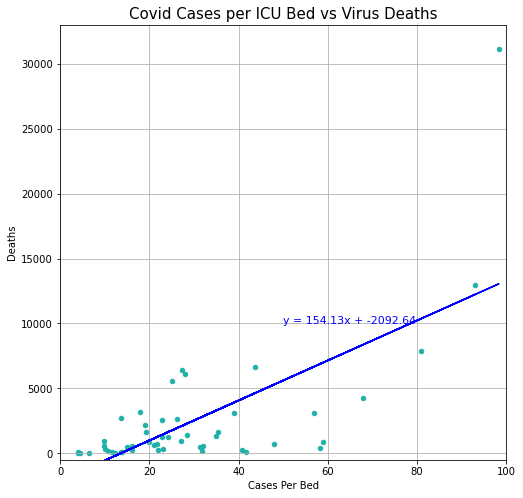

In [59]:
#Scatter plot of Cases per ICU Bed versus # of Covid deaths per State
state_deaths_casebed = senior_bed_pops[['state','Deaths','Cases Per Bed']]
deaths_casebed_stateind = state_deaths_casebed.set_index('state')
x_cases = state_deaths_casebed['Cases Per Bed']
y_deaths = state_deaths_casebed['Deaths']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_cases, y_deaths)
regress_values = x_cases * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
deaths_casebed_stateind.plot(kind='scatter', x='Cases Per Bed',y='Deaths',c='lightseagreen', xlim=(0,100), ylim=(-500,33000), figsize=(8,8))
plt.plot(x_cases,regress_values,"b-")
plt.annotate(line_eq,(50,10000),fontsize=11,color="blue")
plt.title('Covid Cases per ICU Bed vs Virus Deaths',fontsize=15)
print(f"Correlation Coeficient (r) is: {round(rvalue,2)}")
print(f"The r-squared value is: {round(rvalue**2,2)}")


plt.grid()
plt.show()

A stronger correlation can be seen between the # of cases per ICU bed and virus deaths - taking into account overall # of cases of any given state and plotting versus # of deaths will naturally show a more positive correlation.  However, it's interesting to note that states between 20 to 70 cases per ICU bed don't show much difference in total # of deaths.  It's not until you exceed 80 cases per ICU bed that we see signifcant increases in death; again, which can also be a function of total case #'s and other factors previously mentioned. 

## How does population density affect total virus cases?

Correlation Coeficient (r) is: 0.42
The r-squared value is: 0.18


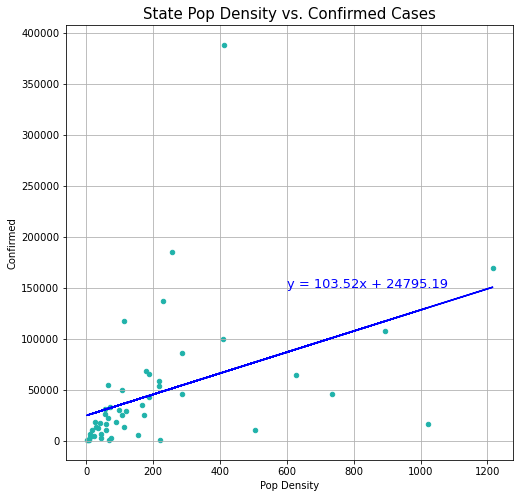

In [56]:
#Scatter plot of state pop density versus # of confirmed cases
cases_pop_nodc = senior_bed_pops.drop(index=[8])
cases_pop_nodc = cases_pop_nodc[['state','Confirmed','Pop Density']]
cases_pop_nodc_stateind = cases_pop_nodc.set_index('state')
x_dens = cases_pop_nodc_stateind['Pop Density']
y_cases = cases_pop_nodc_stateind['Confirmed']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_dens, y_cases)
regress_values = x_dens * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
cases_pop_nodc_stateind.plot(kind='scatter', x='Pop Density',y='Confirmed', c='lightseagreen', marker='o', figsize=(8,8))
plt.plot(x_dens,regress_values,"b-")
plt.annotate(line_eq,(600,150000),fontsize=13,color="blue")
plt.title('State Pop Density vs. Confirmed Cases',fontsize=15)
print(f"Correlation Coeficient (r) is: {round(rvalue,2)}")
print(f"The r-squared value is: {round(rvalue**2,2)}")

plt.grid()
plt.show()

Surprisingly, state population density did not strongly correlate with confirmed case numbers.  However, after a little thought this makes sense as the greatest number of cases are occurring in larger metropolises and cities/towns with more people.  By accounting for the area of the entire state in the density number, it's diluting the population density figure we're using for comparison; it would make more sense to utilize county population density as a more accurate means of testing correlation.

Correlation Coeficient (r) is: 0.83
The r-squared value is: 0.69


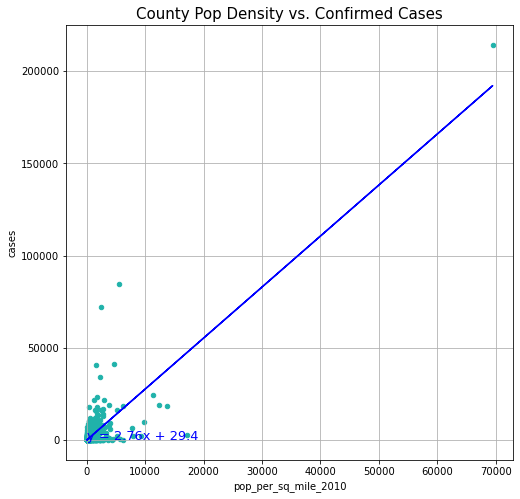

In [63]:
#Scatter plot of county pop density versus # of confirmed cases - using slightly older data covid info (6/13/2020) vs county pop density from census 2010
county_df = pd.read_csv("covid19_us_county.csv")
county_df = county_df.loc[county_df['date'] == '2020-06-13']
x_countydens = county_df['pop_per_sq_mile_2010']
y_cases = county_df['cases']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_countydens, y_cases)
regress_values = x_countydens * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
county_df.plot(kind='scatter', x='pop_per_sq_mile_2010',y='cases', c='lightseagreen', marker='o', figsize=(8,8))
plt.plot(x_countydens,regress_values,"b-")
plt.annotate(line_eq,(1,1),fontsize=13,color="blue")
plt.title('County Pop Density vs. Confirmed Cases',fontsize=15)
print(f"Correlation Coeficient (r) is: {round(rvalue,2)}")
print(f"The r-squared value is: {round(rvalue**2,2)}")

plt.grid()
plt.show()

This graph shows confirmed cases by county and plots it versus that county's population density from 2010's census data.  It shows a much stronger correlation with an r-squared value of 0.69 and aligns with our expectation that population density is a key driver in virus spread.  It would be prudent to revise this graph's data with the most current census data as it becomes available.